<a href="https://colab.research.google.com/github/larissajelima/larissajelima/blob/main/02-estatistica-analise-texto/analise_estatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import sqlalchemy
from google.cloud.sql.connector import Connector

# 1. Configurações da Instância
INSTANCE_CONNECTION_NAME = "project-39620103-ee0c-4665-aec:southamerica-east1:db-gestao-gastronomia-01"
DB_USER = "root"
DB_PASS = "DataS2026." # Certifique-se que esta senha está atualizada no console
DB_NAME = "gestao_gastronomia"

# 2. Inicializa o conector
connector = Connector()

def getconn():
    conn = connector.connect(
        INSTANCE_CONNECTION_NAME,
        "pymysql",
        user=DB_USER,
        password=DB_PASS,
        db=DB_NAME
    )
    return conn

# 3. Cria o engine e carrega os dados
pool = sqlalchemy.create_engine("mysql+pymysql://", creator=getconn)

with pool.connect() as db_conn:
    df_insumos = pd.read_sql("SELECT * FROM insumos", db_conn)
    print("✅ Dados carregados com sucesso!")
    display(df_insumos.head())

✅ Dados carregados com sucesso!


,id_insumo,id_fornecedor,nome_item,categoria,unidade_medida,preco_unitario,estoque_atual,estoque_minimo,data_ultima_atualizacao
0,1,1,Mignon Bovino Limpo,Proteína,KG,95.5,5.0,15.0,2026-01-24 17:33:07
1,2,1,Creme de Leite 35%,Laticínios,L,28.9,12.0,6.0,2026-01-24 17:33:07
2,3,2,Tomate Italiano,Hortifrúti,KG,8.2,20.0,10.0,2026-01-24 17:33:07
3,4,1,Mignon Bovino,Proteína,None,95.5,10.0,5.0,2026-01-26 14:57:22
4,5,1,Picanha Argentina,Proteína,None,120.0,8.0,4.0,2026-01-26 14:57:22


In [7]:
# Agrupamento estatístico
estatistica = df_insumos.groupby('categoria')['preco_unitario'].agg(['mean', 'std', 'median'])

# Cálculo do Coeficiente de Variação (CV) para medir a instabilidade
estatistica['coef_variacao'] = (estatistica['std'] / estatistica['mean']) * 100

print("\n📊 Análise de Volatilidade de Preços por Categoria:")
display(estatistica.round(2))


📊 Análise de Volatilidade de Preços por Categoria:


,mean,std,median,coef_variacao
categoria,,,,
Hortifrúti,7.87,0.85,8.2,10.81
Laticínios,47.30,32.65,28.9,69.03
Proteína,83.48,42.00,95.5,50.32


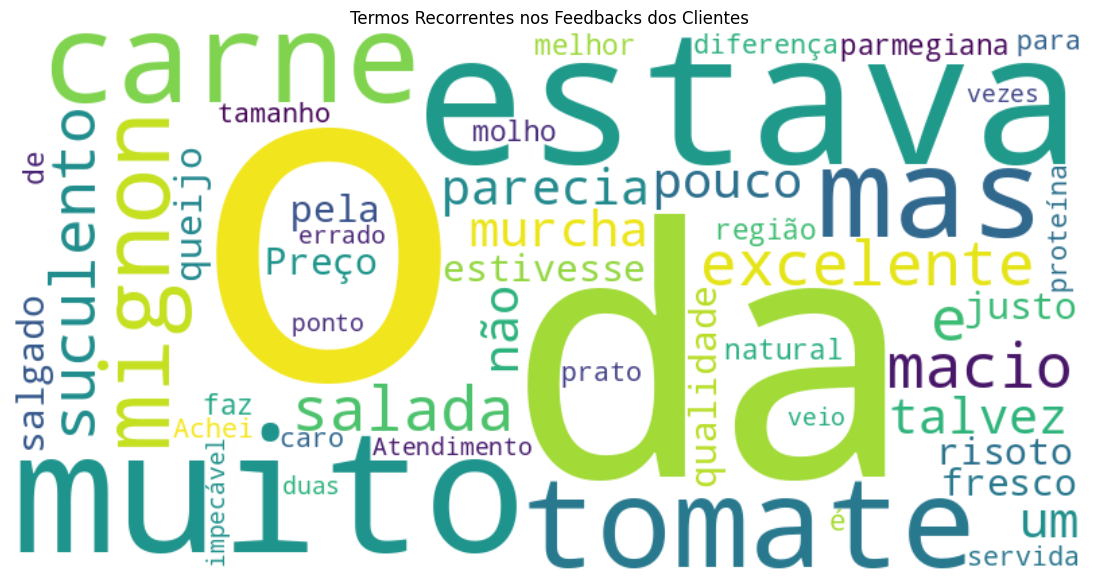

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sqlalchemy import text

# 1. Extração dos dados de texto
with pool.connect() as conn:
    df_fb = pd.read_sql(text("SELECT comentario FROM feedbacks"), conn)

# 2. Limpeza básica e Nuvem de Palavras
# Consolidando todos os comentários em uma única string
texto_total = " ".join(review for review in df_fb['comentario'])

# Gerando a Nuvem de Palavras
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate(texto_total)

# 3. Exibição
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Termos Recorrentes nos Feedbacks dos Clientes")
plt.show()

In [10]:
import os

# Criando a pasta de outputs se não existir (simulando a estrutura do GitHub)
if not os.path.exists('data_outputs'):
    os.makedirs('data_outputs')

# 1. Exportando a Análise Estatística (Volatilidade)
estatistica.to_csv('data_outputs/estatistica_volatilidade_precos.csv', index=True, sep=';', decimal=',')

# 2. Exportando os Feedbacks de Clientes
df_fb.to_csv('data_outputs/feedbacks_clientes_processados.csv', index=False, sep=';')

print("✅ Arquivos exportados com sucesso para a pasta /data_outputs!")

✅ Arquivos exportados com sucesso para a pasta /data_outputs!
